In [ ]:
    import requests
import pandas as pd
import ScraperExtend as scraper
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
import matplotlib.ticker as ticker 
import sns

ModuleNotFoundError: No module named 'sns'

**RDD Analysis:**


**List of Outcome Variables**
- PR Resolving Rate: # of PRs closed per month
- Review Time: Average time between PR Creation and merge
- Issue Resolving rate: # of issues resolved per month
- Issue Resolve Time: Average time taken to close issues
- Commit Frequency: # of commits per month

In [ ]:
gh_api = scraper.ScraperExtend(os.getenv("GITHUB_PERSONAL_ACCESS_TOKEN"))
repo_name = 'tukaani-project/xz'

**Fetching Commit Dataset**

In [ ]:
all_commits = gh_api.repo_commits(repo_name)
commits_df = pd.DataFrame(all_commits)
extracted_data = {
                'sha': commits_df['sha'],
                'author_name': commits_df['commit'].apply(lambda x: x.get('author', {}).get('name', 'Unknown')),
                'committer_name': commits_df['commit'].apply(lambda x: x.get('committer', {}).get('name', 'Unknown')),
                'author_date': commits_df['commit'].apply(lambda x: x.get('author', {}).get('date', 'Unknown')),
                'committer_date': commits_df['commit'].apply(lambda x: x.get('committer', {}).get('date', 'Unknown')),
                'commit_message': commits_df['commit'].apply(lambda x: x.get('message', 'Unknown')),
        }

commit_info_df = pd.DataFrame(extracted_data)

# Convert 'author_date' and 'committer_date' to datetime format
commit_info_df['author_date'] = pd.to_datetime(commit_info_df['author_date']).dt.strftime('%Y-%m-%d %H:%M:%S')
commit_info_df['committer_date'] = pd.to_datetime(commit_info_df['committer_date']).dt.strftime('%Y-%m-%d %H:%M:%S')
commit_info_df

,sha,author_name,committer_name,author_date,committer_date,commit_message
0,9351592710e0df3238b09d39c545a643c50ac88f,Lasse Collin,Lasse Collin,2025-02-22 14:04:58,2025-02-22 14:04:58,Update THANKS
1,9023be7831faca2f28def55e16c39e3a42e1e262,Lasse Collin,Lasse Collin,2025-02-19 14:33:52,2025-02-19 14:33:52,Translations: Update the Croatian translation
2,2eaf242c56e8c65db83d48b018fa44aeafeb33a5,Lasse Collin,Lasse Collin,2025-02-17 19:46:15,2025-02-17 19:48:24,Build: Fix out-of-tree builds when using the r...
3,41322b2c60cd2c67a1053cb40d27e573420185b7,Lasse Collin,Lasse Collin,2025-02-17 16:25:52,2025-02-17 16:25:52,m4/getopt.m4: Remove an outdated comment
4,03c23a4952bce1b50a1d213ca2d1c15acd76a489,Lasse Collin,Lasse Collin,2025-02-17 16:11:58,2025-02-17 16:11:58,Build: Allow forcing the use of the replacemen...
...,...,...,...,...,...,...
2808,07ac881779a8477f2c1ab112b91a129e24aa743c,Lasse Collin,Lasse Collin,2007-12-09 15:06:45,2007-12-09 15:06:45,Take advantage of return_if_error() macro in m...
2809,41338717964f510ee61d70b25bd4c502ec9f77cf,Lasse Collin,Lasse Collin,2007-12-09 10:13:01,2007-12-09 10:13:01,Added a bunch of .lzma test files.
2810,ff946ceb7975d4f11950afd33f6315b4d20d1a03,Lasse Collin,Lasse Collin,2007-12-09 09:24:48,2007-12-09 09:24:48,Re-enabled the security checks in Subblock dec...
2811,2bf36d22d2c24ac3f488e63b35564fa2f6dab8d1,Lasse Collin,Lasse Collin,2007-12-09 09:03:28,2007-12-09 09:03:28,Fixed the tests to build with -Werror.


In [ ]:
commit_info_df.to_csv('commit_info.csv', index=False)
commit_info_df

,sha,author_name,committer_name,author_date,committer_date,commit_message
0,9351592710e0df3238b09d39c545a643c50ac88f,Lasse Collin,Lasse Collin,2025-02-22 14:04:58,2025-02-22 14:04:58,Update THANKS
1,9023be7831faca2f28def55e16c39e3a42e1e262,Lasse Collin,Lasse Collin,2025-02-19 14:33:52,2025-02-19 14:33:52,Translations: Update the Croatian translation
2,2eaf242c56e8c65db83d48b018fa44aeafeb33a5,Lasse Collin,Lasse Collin,2025-02-17 19:46:15,2025-02-17 19:48:24,Build: Fix out-of-tree builds when using the r...
3,41322b2c60cd2c67a1053cb40d27e573420185b7,Lasse Collin,Lasse Collin,2025-02-17 16:25:52,2025-02-17 16:25:52,m4/getopt.m4: Remove an outdated comment
4,03c23a4952bce1b50a1d213ca2d1c15acd76a489,Lasse Collin,Lasse Collin,2025-02-17 16:11:58,2025-02-17 16:11:58,Build: Allow forcing the use of the replacemen...
...,...,...,...,...,...,...
2808,07ac881779a8477f2c1ab112b91a129e24aa743c,Lasse Collin,Lasse Collin,2007-12-09 15:06:45,2007-12-09 15:06:45,Take advantage of return_if_error() macro in m...
2809,41338717964f510ee61d70b25bd4c502ec9f77cf,Lasse Collin,Lasse Collin,2007-12-09 10:13:01,2007-12-09 10:13:01,Added a bunch of .lzma test files.
2810,ff946ceb7975d4f11950afd33f6315b4d20d1a03,Lasse Collin,Lasse Collin,2007-12-09 09:24:48,2007-12-09 09:24:48,Re-enabled the security checks in Subblock dec...
2811,2bf36d22d2c24ac3f488e63b35564fa2f6dab8d1,Lasse Collin,Lasse Collin,2007-12-09 09:03:28,2007-12-09 09:03:28,Fixed the tests to build with -Werror.


**Fetching Issues**

In [ ]:
all_issues = gh_api.repo_issues(repo_name)
issues_df = pd.DataFrame(all_issues)

extracted_data = {
                'issue_#': issues_df['number'],
                'state': issues_df['state'],
                'created_at': issues_df['created_at'],
                'updated_at': issues_df['updated_at'],
                'closed_at': issues_df['closed_at'],
                'title': issues_df['title'],
                'body': issues_df['body'],
                'url': issues_df['html_url'],
                'user': issues_df['user'].apply(lambda x: x.get('login', 'Unknown'))
        }

issues_info_df = pd.DataFrame(extracted_data)
issues_info_df['created_at'] = pd.to_datetime(issues_info_df['created_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
issues_info_df['updated_at'] = pd.to_datetime(issues_info_df['updated_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
issues_info_df['closed_at'] = pd.to_datetime(issues_info_df['closed_at']).dt.strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
issues_info_df.to_csv('issues_info.csv', index=False)
issues_info_df

,issue_#,state,created_at,updated_at,closed_at,title,body,url,user
0,167,open,2025-02-28 08:09:37,2025-02-28 08:33:36,NaN,hexdump text file has better compression than ...,"Hi guys,\n\nI found something curious, it migh...",https://github.com/tukaani-project/xz/issues/167,bigsmile74
1,164,open,2025-02-02 15:35:58,2025-02-02 16:01:25,NaN,hard link handling,I can understand the difficulty handling files...,https://github.com/tukaani-project/xz/issues/164,brianjmurrell
2,163,closed,2025-02-02 14:39:26,2025-02-11 16:08:44,2025-02-08 21:06:29,Shove xz into linux distro maintainers,We would like to propose taking advantage of l...,https://github.com/tukaani-project/xz/issues/163,SoniEx2
3,162,open,2025-02-01 00:33:27,2025-02-08 11:47:20,NaN,xz-5.6.4 scan reports trojans,Some Virusscanner reported issues and trojans ...,https://github.com/tukaani-project/xz/issues/162,netmaster4
4,161,open,2025-01-30 07:41:06,2025-01-30 18:53:26,NaN,Compiling with emscripten fails,Compiling with emscripten fails with:\n\n```\n...,https://github.com/tukaani-project/xz/issues/161,Maddimax
...,...,...,...,...,...,...,...,...,...
61,20,closed,2023-01-16 12:29:45,2023-01-16 14:34:57,2023-01-16 14:23:49,[Bug]: reject a valid lzma file,"### Describe the bug\n\nHi, I recently fuzz th...",https://github.com/tukaani-project/xz/issues/20,boofish
62,18,open,2023-01-12 16:27:27,2024-04-16 16:34:36,NaN,[Feature Request]: Create Windows CI Support,### Describe the Feature\n\nBoth MinGw and CMa...,https://github.com/tukaani-project/xz/issues/18,JiaT75
63,16,closed,2023-01-10 17:14:46,2023-01-11 14:54:17,2023-01-11 14:54:17,[Bug]: MacOS autotool build fails when -werror...,### Describe the bug\n\nThe CI/CD scripts dete...,https://github.com/tukaani-project/xz/issues/16,JiaT75
64,14,closed,2023-01-07 13:39:13,2023-01-16 13:37:39,2023-01-16 13:37:39,[Bug]: Inconsistent behavior with --format=raw...,### Describe the bug\n\nIf --format is set to ...,https://github.com/tukaani-project/xz/issues/14,JiaT75


**Fetching PRs**

In [ ]:
all_prs = gh_api.repo_pulls(repo_name)
prs_df = pd.DataFrame(all_prs)
extracted_data = {
                'pr_#': prs_df['number'],
                'state': prs_df['state'],
                'created_at': prs_df['created_at'],
                'updated_at': prs_df['updated_at'],
                'closed_at': prs_df['closed_at'],
                'merged_at' : prs_df['merged_at'],
                'title': prs_df['title'],
                'body': prs_df['body'],
                'url': prs_df['html_url'],
                'issue_url' : prs_df['issue_url'],
                'merge_sha' : prs_df['merge_commit_sha'],
                'user': prs_df['user'].apply(lambda x: x.get('login', 'Unknown'))
        }

prs_info_df = pd.DataFrame(extracted_data)
prs_info_df['created_at'] = pd.to_datetime(prs_info_df['created_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
prs_info_df['updated_at'] = pd.to_datetime(prs_info_df['updated_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
prs_info_df['closed_at'] = pd.to_datetime(prs_info_df['closed_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
prs_info_df['merged_at'] = pd.to_datetime(prs_info_df['merged_at']).dt.strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
prs_info_df.to_csv('prs_info.csv', index=False)
prs_info_df

,pr_#,state,created_at,updated_at,closed_at,merged_at,title,body,url,issue_url,merge_sha,user
0,166,closed,2025-02-16 17:28:42,2025-02-19 14:24:33,2025-02-17 16:48:16,NaN,Build: Add support for `gl_REPLACE_GETOPT_ALWA...,Gnulib supports forcing the replacement of get...,https://github.com/tukaani-project/xz/pull/166,https://api.github.com/repos/tukaani-project/x...,7df1dfcbaed53defa71d578c27fc21fc1e5fbcaa,lzcunt
1,165,closed,2025-02-03 23:07:45,2025-02-06 04:38:14,2025-02-06 04:37:38,NaN,Fixed typos and improved Polish translation cl...,Fixed typos and improved Polish translation cl...,https://github.com/tukaani-project/xz/pull/165,https://api.github.com/repos/tukaani-project/x...,883b5b46293af4f689a649c15ef5a972caa482e1,majevva
2,160,closed,2025-01-30 03:05:48,2025-01-30 18:27:58,2025-01-30 18:25:12,NaN,update fr.po,I added some translation so I was sure of the ...,https://github.com/tukaani-project/xz/pull/160,https://api.github.com/repos/tukaani-project/x...,0847354cad31ae52b3e16b9b1271eaa60536a9fb,femallet
3,159,closed,2024-12-27 08:21:32,2025-01-05 20:28:28,2025-01-04 08:52:23,NaN,xz: Add --synchronous,xz's default behavior is to delete the input f...,https://github.com/tukaani-project/xz/pull/159,https://api.github.com/repos/tukaani-project/x...,7ba6e83fa25f497e72ea9239b7c12b1f3d7a91a0,Larhzu
4,158,closed,2024-12-22 13:46:31,2024-12-22 18:44:01,2024-12-22 18:15:18,NaN,CMake: Disable unity builds project-wide,I have a project that uses xz via CMake's `Fet...,https://github.com/tukaani-project/xz/pull/158,https://api.github.com/repos/tukaani-project/x...,b15af38a0f8b28095193a9ed522eb60f70856a43,dextercd
...,...,...,...,...,...,...,...,...,...,...,...,...
86,5,closed,2022-12-28 13:50:28,2022-12-29 12:02:18,2022-12-28 18:12:48,2022-12-28 18:12:48,Mytime tweaks,## Pull request checklist\r\n\r\nPlease check ...,https://github.com/tukaani-project/xz/pull/5,https://api.github.com/repos/tukaani-project/x...,8566d3013e5a40c397fe0e897f3512131dba80d3,JiaT75
87,4,closed,2022-12-20 13:57:34,2023-01-19 16:51:13,2023-01-19 16:51:13,2023-01-19 16:51:13,Doxygen,## Pull request checklist\r\n\r\nPlease check ...,https://github.com/tukaani-project/xz/pull/4,https://api.github.com/repos/tukaani-project/x...,6327a045f34d48fc5afc58ba0d32a82c94403049,JiaT75
88,3,closed,2022-12-16 13:30:59,2022-12-20 14:05:28,2022-12-20 14:05:21,2022-12-20 14:05:21,Doxygen: Update .gitignore for generating docs...,"In source builds are not recommended, but we s...",https://github.com/tukaani-project/xz/pull/3,https://api.github.com/repos/tukaani-project/x...,30a6f5f5b8cfb94cf6227dce3b168d4d125b4fc6,JiaT75
89,2,closed,2022-12-16 13:11:03,2022-12-19 15:38:20,2022-12-19 15:38:12,2022-12-19 15:38:12,CMake: Update .gitignore for CMake artifacts f...,"In source builds are not recommended, but we c...",https://github.com/tukaani-project/xz/pull/2,https://api.github.com/repos/tukaani-project/x...,d6fed05468208ad481ba14cfaed29782632ca196,JiaT75


**RDD on Commit Frequency**
- Forcing Variable: Time (months since Jia Tan joined)
- Cutoff Date:      2022-10-28 (when Jia Tan got added to the Tukaani Organization)
- Treatment Group:  2022-10-28 to 2024-03-28
- Control Group:    2021-01-01 to 2022-10-27 
- Outcome Variable: Monthly commit frequency

**RDD Expectation:**
- If commit frequency significantly increased after Jia Tan joined, it suggests a potential correlation.
- A discontinuity (sharp increase/decrease in commits at the cutoff date) would indicate an effect.

In [ ]:
maintainer_join_date = pd.to_datetime("2022-10-28")  # Jia Tan's maintainer join date
attack_detected_date = pd.to_datetime("2024-03-28")  # Detection of attack
control_start_date = pd.to_datetime("2021-01-01")  # Start of control period


# filter dataset to only include control and treatment period commits
commit_info_df["committer_date"] = pd.to_datetime(commit_info_df["committer_date"], errors="coerce")
commit_info_df = commit_info_df[(commit_info_df["committer_date"] >= control_start_date) & (commit_info_df["committer_date"] <= attack_detected_date)]

commit_info_df.to_csv('commit_info_filtered.csv', index=False)

In [ ]:

# calculate months and weeks since maintainer join date
commit_info_df["months_since_JT_joined"] = ((commit_info_df["committer_date"] - maintainer_join_date) / pd.Timedelta(days=30)).astype(int)
commit_info_df["weeks_since_JT_joined"] = ((commit_info_df["committer_date"] - maintainer_join_date) / pd.Timedelta(days=7)).astype(int)


# calculate monthly and weekly commit frequency
monthly_commits = commit_info_df.groupby("months_since_JT_joined").size().reset_index(name="commit_count")
weekly_commits = commit_info_df.groupby("weeks_since_JT_joined").size().reset_index(name="commit_count")

# label treatment and control group (1 for treatment, 0 for control)
monthly_commits["treatment"] = (monthly_commits["months_since_JT_joined"] >= 0).astype(int)
weekly_commits["treatment"] = (weekly_commits["weeks_since_JT_joined"] >= 0).astype(int)

C:\Users\yhlin\AppData\Local\Temp\ipykernel_5080\3557664923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commit_info_df["months_since_JT_joined"] = ((commit_info_df["committer_date"] - maintainer_join_date) / pd.Timedelta(days=30)).astype(int)
C:\Users\yhlin\AppData\Local\Temp\ipykernel_5080\3557664923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commit_info_df["weeks_since_JT_joined"] = ((commit_info_df["committer_date"] - maintainer_join_date) / pd.Timedelta(days=7)).astype(int)


In [ ]:
# linear regression model
X = monthly_commits[["months_since_JT_joined", "treatment"]]
y = monthly_commits["commit_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

# predict commit count for visualization
monthly_commits["predicted_commit_count"] = linear_model.predict(X)



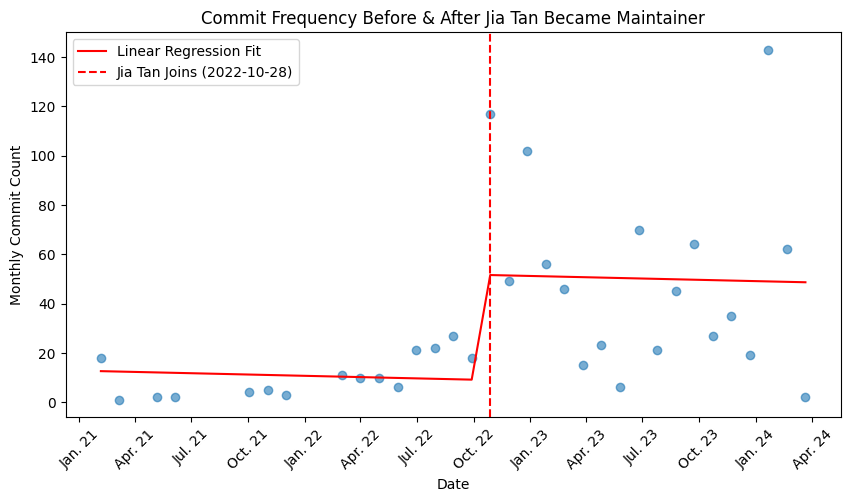

In [ ]:
monthly_commits["date"] = maintainer_join_date + pd.to_timedelta(monthly_commits["months_since_JT_joined"] * 30, unit="D")

plt.figure(figsize=(10, 5))
plt.scatter(monthly_commits["date"], monthly_commits["commit_count"], alpha=0.6)
plt.plot(monthly_commits["date"], monthly_commits["predicted_commit_count"], color="red", label="Linear Regression Fit")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))  # Format as "Nov-23"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show labels every 3 months

plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Monthly Commit Count")
plt.title("Commit Frequency Before & After Jia Tan Became Maintainer")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend()
plt.show()

In [ ]:
# linear regression model
X = weekly_commits[["weeks_since_JT_joined", "treatment"]]
y = weekly_commits["commit_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

# predict commit count for visualization
weekly_commits["predicted_commit_count"] = linear_model.predict(X)


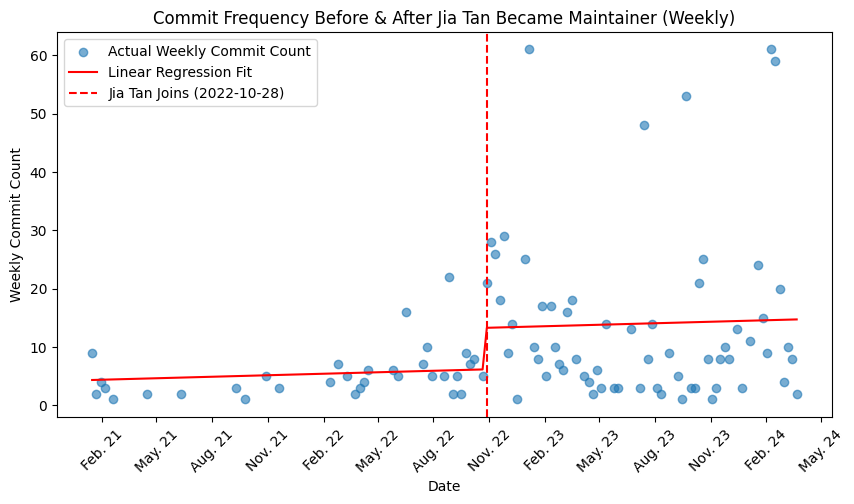

In [ ]:

weekly_commits["date"] = maintainer_join_date + pd.to_timedelta(weekly_commits["weeks_since_JT_joined"] * 7, unit="D")


plt.figure(figsize=(10, 5))
plt.scatter(weekly_commits["date"], weekly_commits["commit_count"], alpha=0.6, label="Actual Weekly Commit Count")
plt.plot(weekly_commits["date"], weekly_commits["predicted_commit_count"], color="red", label="Linear Regression Fit")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))  # Format as "Oct-22"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

plt.xlabel("Date")
plt.ylabel("Weekly Commit Count")
plt.title("Commit Frequency Before & After Jia Tan Became Maintainer (Weekly)")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend()
plt.show()


**RDD on PR Resolve Frequency**
- Forcing Variable: Time (months since Jia Tan joined)
- Cutoff Date:      2022-10-28 (when Jia Tan got added to the Tukaani Organization)
- Treatment Group:  2022-10-28 to 2024-03-28
- Control Group:    2021-01-01 to 2022-10-27 (1.5 year before)
- Outcome Variable: Monthly PR resolve frequency

**RDD Expectation:**
- If PR resolve frequency significantly increased after Jia Tan joined, it suggests a potential correlation.
- A discontinuity would indicate an effect.

In [ ]:
prs_info_df["created_at"] = pd.to_datetime(prs_info_df["created_at"], errors="coerce")
prs_info_df["closed_at"] = pd.to_datetime(prs_info_df["closed_at"], errors="coerce")

prs_info_df = prs_info_df[(prs_info_df["state"] == "closed")]

prs_info_df = prs_info_df[
    (prs_info_df["created_at"] >= control_start_date) & 
    (prs_info_df["created_at"] <= attack_detected_date) &
    (prs_info_df["closed_at"] <= attack_detected_date)  # Ensure PRs were closed within the period
]

prs_info_df["months_since_JT_joined"] = (prs_info_df["closed_at"] - maintainer_join_date) / pd.Timedelta(days=30)
prs_info_df = prs_info_df.dropna(subset=["months_since_JT_joined"])  # Drop NaN rows
prs_info_df["months_since_JT_joined"] = prs_info_df["months_since_JT_joined"].astype(int)

prs_info_df["weeks_since_JT_joined"] = (prs_info_df["closed_at"] - maintainer_join_date) / pd.Timedelta(days=7)
prs_info_df = prs_info_df.dropna(subset=["weeks_since_JT_joined"])  # Drop NaN rows
prs_info_df["weeks_since_JT_joined"] = prs_info_df["weeks_since_JT_joined"].astype(int)

monthly_pr_closed = prs_info_df.groupby("months_since_JT_joined").size().reset_index(name="pr_closed_count")
monthly_pr_closed["treatment"] = (monthly_pr_closed["months_since_JT_joined"] >= 0).astype(int)

weekly_pr_closed = prs_info_df.groupby("weeks_since_JT_joined").size().reset_index(name="pr_closed_count")
weekly_pr_closed["treatment"] = (weekly_pr_closed["weeks_since_JT_joined"] >= 0).astype(int)

In [ ]:
X = monthly_pr_closed[["months_since_JT_joined", "treatment"]]
y = monthly_pr_closed["pr_closed_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

monthly_pr_closed["predicted_pr_closed_count"] = linear_model.predict(X)


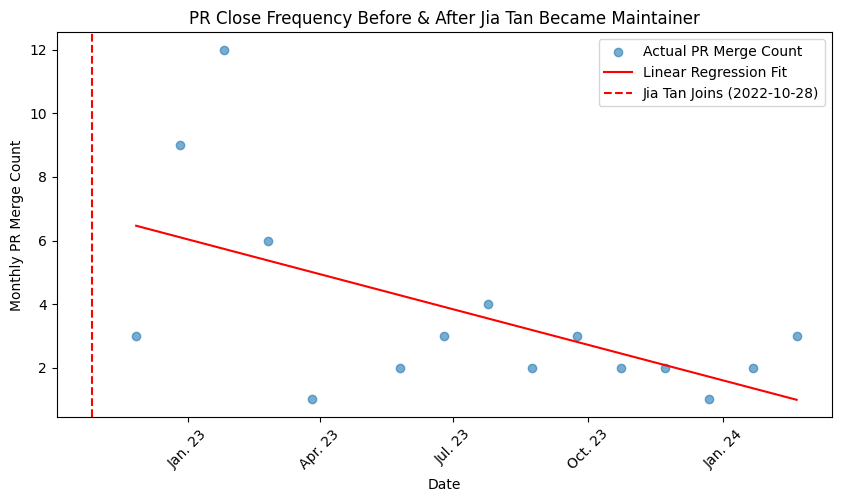

In [ ]:
monthly_pr_closed["date"] = maintainer_join_date + pd.to_timedelta(monthly_pr_closed["months_since_JT_joined"] * 30, unit="D")

plt.figure(figsize=(10, 5))
plt.scatter(monthly_pr_closed["date"], monthly_pr_closed["pr_closed_count"], alpha=0.6, label="Actual PR Merge Count")
plt.plot(monthly_pr_closed["date"], monthly_pr_closed["predicted_pr_closed_count"], color="red", label="Linear Regression Fit")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))  
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  

plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

plt.xlabel("Date")
plt.ylabel("Monthly PR Merge Count")
plt.title("PR Close Frequency Before & After Jia Tan Became Maintainer")
plt.xticks(rotation=45) 
plt.legend()
plt.show()


In [ ]:
# linear regression model
X = weekly_pr_closed[["weeks_since_JT_joined", "treatment"]]
y = weekly_pr_closed["pr_closed_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

# predict commit count for visualization
weekly_pr_closed["predicted_pr_closed_count"] = linear_model.predict(X)


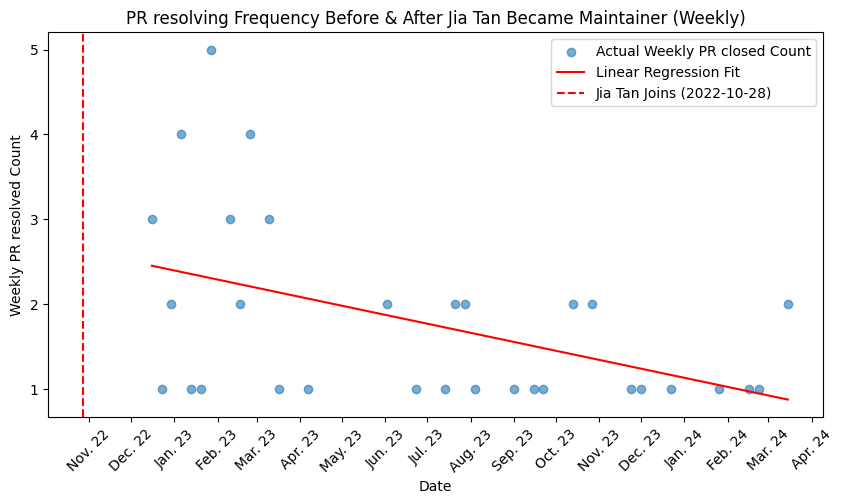

In [ ]:
weekly_pr_closed["date"] = maintainer_join_date + pd.to_timedelta(weekly_pr_closed["weeks_since_JT_joined"] * 7, unit="D")

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(weekly_pr_closed["date"], weekly_pr_closed["pr_closed_count"], alpha=0.6, label="Actual Weekly PR closed Count")
plt.plot(weekly_pr_closed["date"], weekly_pr_closed["predicted_pr_closed_count"], color="red", label="Linear Regression Fit")

# Formatting the x-axis labels for weekly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))  # Format as "Oct-22"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Cutoff marker for when Jia Tan joined
plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Weekly PR resolved Count")
plt.title("PR resolving Frequency Before & After Jia Tan Became Maintainer (Weekly)")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend()
plt.show()


**RDD on Issue Resolve Frequency**
- Forcing Variable: Time (months since Jia Tan joined)
- Cutoff Date:      2022-10-28 (when Jia Tan got added to the Tukaani Organization)
- Treatment Group:  2022-10-28 to 2024-03-28
- Control Group:    2021-01-01 to 2022-10-27 (1.5 year before)
- Outcome Variable: Monthly Issue resolve frequency

**RDD Expectation:**
- If issue resolve frequency significantly increased after Jia Tan joined, it suggests a potential correlation.
- A discontinuity would indicate an effect.

In [ ]:
issues_info_df["created_at"] = pd.to_datetime(issues_info_df["created_at"], errors="coerce")
issues_info_df["closed_at"] = pd.to_datetime(issues_info_df["closed_at"], errors="coerce")

issues_info_df = issues_info_df[(issues_info_df["state"] == "closed")]
issues_info_df = issues_info_df[
    (issues_info_df["created_at"] >= control_start_date) & 
    (issues_info_df["created_at"] <= attack_detected_date) &
    (issues_info_df["closed_at"] <= attack_detected_date)  # Ensure issues were closed within the period
]

issues_info_df["months_since_JT_joined"] = (issues_info_df["created_at"] - maintainer_join_date) / pd.Timedelta(days=30)
issues_info_df["weeks_since_JT_joined"] = (issues_info_df["created_at"] - maintainer_join_date) / pd.Timedelta(days=7)

issues_info_df = issues_info_df.dropna(subset=["months_since_JT_joined"])
issues_info_df = issues_info_df.dropna(subset=["weeks_since_JT_joined"])

issues_info_df["months_since_JT_joined"] = issues_info_df["months_since_JT_joined"].astype(int)
issues_info_df["weeks_since_JT_joined"] = issues_info_df["weeks_since_JT_joined"].astype(int)

monthly_issues_closed = issues_info_df.groupby("months_since_JT_joined").size().reset_index(name="issue_closed_count")
weekly_issues_closed = issues_info_df.groupby("weeks_since_JT_joined").size().reset_index(name="issue_closed_count")

monthly_issues_closed["treatment"] = (monthly_issues_closed["months_since_JT_joined"] >= 0).astype(int)
weekly_issues_closed["treatment"] = (weekly_issues_closed["weeks_since_JT_joined"] >= 0).astype(int)

In [ ]:
X = monthly_issues_closed[["months_since_JT_joined", "treatment"]]
y = monthly_issues_closed["issue_closed_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

monthly_issues_closed["predicted_issue_closed_count"] = linear_model.predict(X)


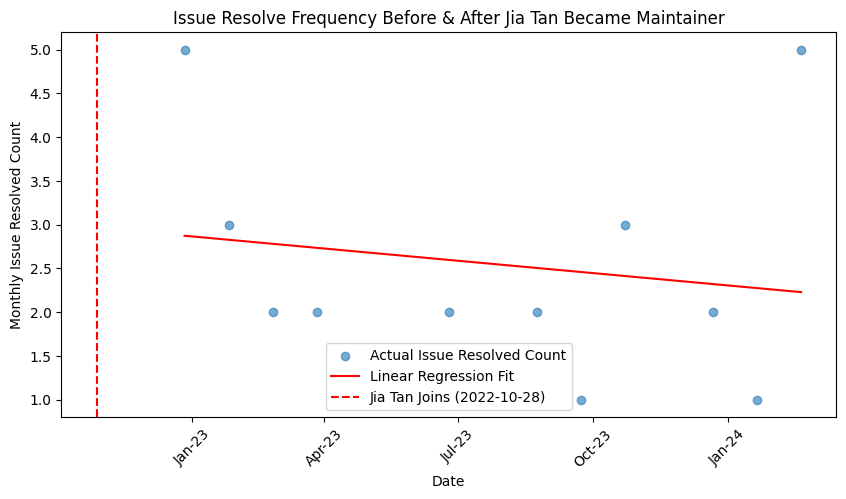

In [ ]:
monthly_issues_closed["date"] = maintainer_join_date + pd.to_timedelta(monthly_issues_closed["months_since_JT_joined"] * 30, unit="D")

plt.figure(figsize=(10, 5))
plt.scatter(monthly_issues_closed["date"], monthly_issues_closed["issue_closed_count"], alpha=0.6, label="Actual Issue Resolved Count")
plt.plot(monthly_issues_closed["date"], monthly_issues_closed["predicted_issue_closed_count"], color="red", label="Linear Regression Fit")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%y")) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 

plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

plt.xlabel("Date")
plt.ylabel("Monthly Issue Resolved Count")
plt.title("Issue Resolve Frequency Before & After Jia Tan Became Maintainer")
plt.xticks(rotation=45)  
plt.legend()
plt.show()


Issues

In [ ]:
# linear regression model
X = weekly_issues_closed[["weeks_since_JT_joined", "treatment"]]
y = weekly_issues_closed["issue_closed_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

# predict commit count for visualization
weekly_issues_closed["predicted_issue_closed_count"] = linear_model.predict(X)


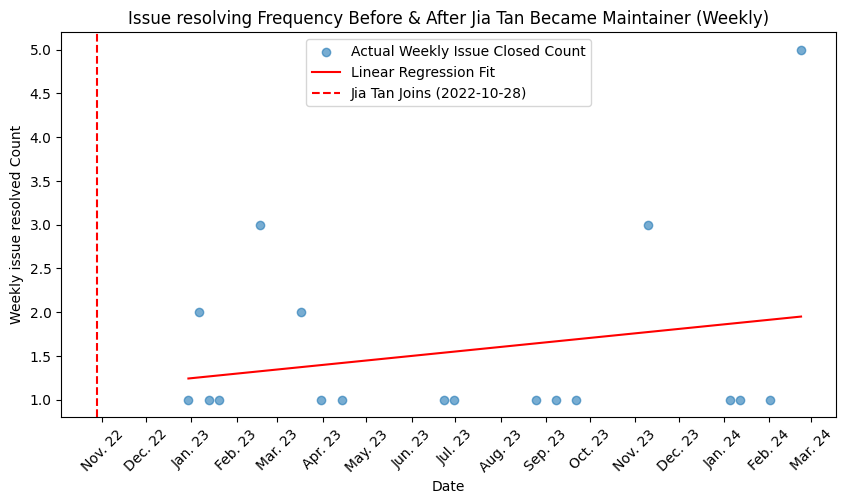

In [ ]:
weekly_issues_closed["date"] = maintainer_join_date + pd.to_timedelta(weekly_issues_closed["weeks_since_JT_joined"] * 7, unit="D")

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(weekly_issues_closed["date"], weekly_issues_closed["issue_closed_count"], alpha=0.6, label="Actual Weekly Issue Closed Count")
plt.plot(weekly_issues_closed["date"], weekly_issues_closed["predicted_issue_closed_count"], color="red", label="Linear Regression Fit")

# Formatting the x-axis labels for weekly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))  # Format as "Oct-22"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Cutoff marker for when Jia Tan joined
plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Weekly issue resolved Count")
plt.title("Issue resolving Frequency Before & After Jia Tan Became Maintainer (Weekly)")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend()
plt.show()


**RDD on Suspicious Files Commit Frequency**
- Forcing Variable: Time (Weekly since Jia Tan joined)
- Cutoff Date:      2022-10-28 (when Jia Tan got added to the Tukaani Organization)
- Treatment Group:  2022-10-28 to 2024-03-28
- Control Group:    2021-01-01 to 2022-10-27 (1.5 year before)
- Outcome Variable: Weekly commit frequency on chosen files

**RDD Expectation:**
- If commit frequency significantly increased after Jia Tan joined, it suggests a potential correlation.
- A discontinuity would indicate an effect.

In [ ]:
def fetch_commit_history(repo_owner, repo_name, file_path, github_token):
    """
    Fetches commit history for a specific file in a GitHub repository.
    
    Parameters:
    
        repo_owner (str): GitHub username or organization name.
        repo_name (str): Repository name.
        file_path (str): Path to the file in the repository.
        github_token (str): GitHub personal access token for authentication.
        
    Returns:
        pd.DataFrame: DataFrame containing commit history.
    """
    url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/commits"
    params = {"path": file_path, "per_page": 100}  # Fetch commits for the file
    headers = {"Authorization": f"token {github_token}"}

    commit_data = []
    
    while url:
        response = requests.get(url, headers=headers, params=params)
        if response.status_code != 200:
            print("Error fetching data:", response.json())
            break
        commits = response.json()
        if not commits:
            break

        for commit in commits:
            commit_info = commit.get("commit", {})
            author_info = commit_info.get("author", {})
            committer_info = commit_info.get("committer", {})

            commit_data.append({
                "commit_hash": commit["sha"],
                "commit_date": committer_info.get("date", "Unknown"),
                "author_name": author_info.get("name", "Unknown"),
                "committer_name": committer_info.get("name", "Unknown"),
                "commit_message": commit_info.get("message", "Unknown")
            })
        
        # Pagination handling
        url = response.links.get("next", {}).get("url")

    # Convert to DataFrame
    commit_df = pd.DataFrame(commit_data)
    commit_df["commit_date"] = pd.to_datetime(commit_df["commit_date"])
    
    return commit_df

In [ ]:
GITHUB_TOKEN = os.getenv("GITHUB_PERSONAL_ACCESS_TOKEN")
repo_owner = "tukaani-project"
repo_name = "xz"
configure_path = "configure.ac"  # Replace with the file path you want to investigate
cmakelist_path = "CMakeLists.txt"
backdoor_path = "tests/files"


# Fetch commit history for the specified file
configure_commit_df = fetch_commit_history(repo_owner, repo_name, configure_path, GITHUB_TOKEN)
cmakelist_commit_df = fetch_commit_history(repo_owner, repo_name, cmakelist_path, GITHUB_TOKEN)
backdoor_commit_df = fetch_commit_history(repo_owner, repo_name, backdoor_path, GITHUB_TOKEN)




In [ ]:


configure_commit_df["commit_date"] = pd.to_datetime(configure_commit_df["commit_date"].dt.date)
cmakelist_commit_df["commit_date"] = pd.to_datetime(cmakelist_commit_df["commit_date"].dt.date)
backdoor_commit_df["commit_date"] = pd.to_datetime(backdoor_commit_df["commit_date"].dt.date)

configure_commit_df = configure_commit_df[
    (configure_commit_df["commit_date"] >= control_start_date) & 
    (configure_commit_df["commit_date"] <= attack_detected_date)
]
cmakelist_commit_df = cmakelist_commit_df[
    (cmakelist_commit_df["commit_date"] >= control_start_date) & 
    (cmakelist_commit_df["commit_date"] <= attack_detected_date)
]z
backdoor_commit_df = backdoor_commit_df[
    (backdoor_commit_df["commit_date"] >= control_start_date) & 
    (backdoor_commit_df["commit_date"] <= attack_detected_date)
]

configure_commit_df["weeks_since_JT_joined"] = (configure_commit_df["commit_date"] - maintainer_join_date) / pd.Timedelta(days=7)
configure_commit_df = configure_commit_df.dropna(subset=["weeks_since_JT_joined"])
configure_commit_df["weeks_since_JT_joined"] = configure_commit_df["weeks_since_JT_joined"].astype(int)
weekly_configure_commits = configure_commit_df.groupby("weeks_since_JT_joined").size().reset_index(name="commit_count")
weekly_configure_commits["treatment"] = (weekly_configure_commits["weeks_since_JT_joined"] >= 0).astype(int)

cmakelist_commit_df["weeks_since_JT_joined"] = (cmakelist_commit_df["commit_date"] - maintainer_join_date) / pd.Timedelta(days=7)
cmakelist_commit_df = cmakelist_commit_df.dropna(subset=["weeks_since_JT_joined"])
cmakelist_commit_df["weeks_since_JT_joined"] = cmakelist_commit_df["weeks_since_JT_joined"].astype(int)
weekly_cmakelist_commits = cmakelist_commit_df.groupby("weeks_since_JT_joined").size().reset_index(name="commit_count")
weekly_cmakelist_commits["treatment"] = (weekly_cmakelist_commits["weeks_since_JT_joined"] >= 0).astype(int)

backdoor_commit_df["weeks_since_JT_joined"] = (backdoor_commit_df["commit_date"] - maintainer_join_date) / pd.Timedelta(days=7)
backdoor_commit_df = backdoor_commit_df.dropna(subset=["weeks_since_JT_joined"])
backdoor_commit_df["weeks_since_JT_joined"] = backdoor_commit_df["weeks_since_JT_joined"].astype(int)
weekly_backdoor_commits = backdoor_commit_df.groupby("weeks_since_JT_joined").size().reset_index(name="commit_count")
weekly_backdoor_commits["treatment"] = (weekly_backdoor_commits["weeks_since_JT_joined"] >= 0).astype(int)

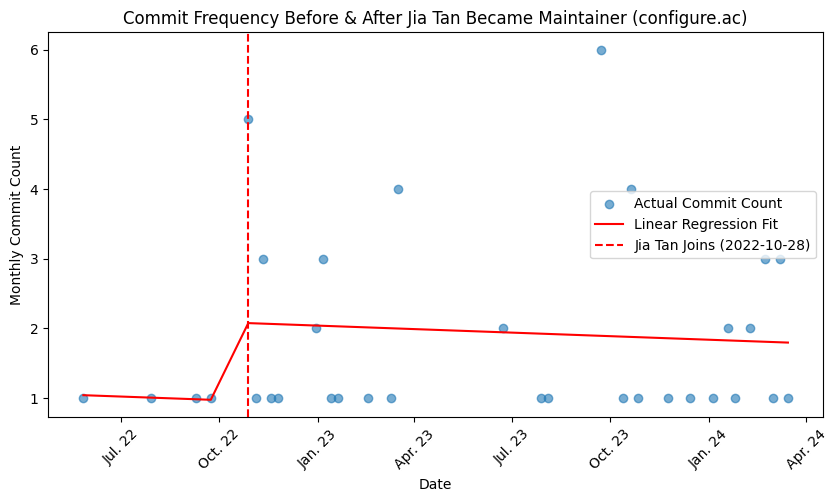

In [ ]:
# Linear regression model
X = weekly_configure_commits[["weeks_since_JT_joined", "treatment"]]
y = weekly_configure_commits["commit_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict commit count for visualization
weekly_configure_commits["predicted_commit_count"] = linear_model.predict(X)
weekly_configure_commits["date"] = maintainer_join_date + pd.to_timedelta(weekly_configure_commits["weeks_since_JT_joined"] * 7, unit="D")

# plot
plt.figure(figsize=(10, 5))
plt.scatter(weekly_configure_commits["date"], weekly_configure_commits["commit_count"], alpha=0.6, label="Actual Commit Count")
plt.plot(weekly_configure_commits["date"], weekly_configure_commits["predicted_commit_count"], color="red", label="Linear Regression Fit")

# Formatting the x-axis labels for monthly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Cutoff marker for when Jia Tan joined
plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Monthly Commit Count")
plt.title("Commit Frequency Before & After Jia Tan Became Maintainer (configure.ac)")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend()
plt.show()



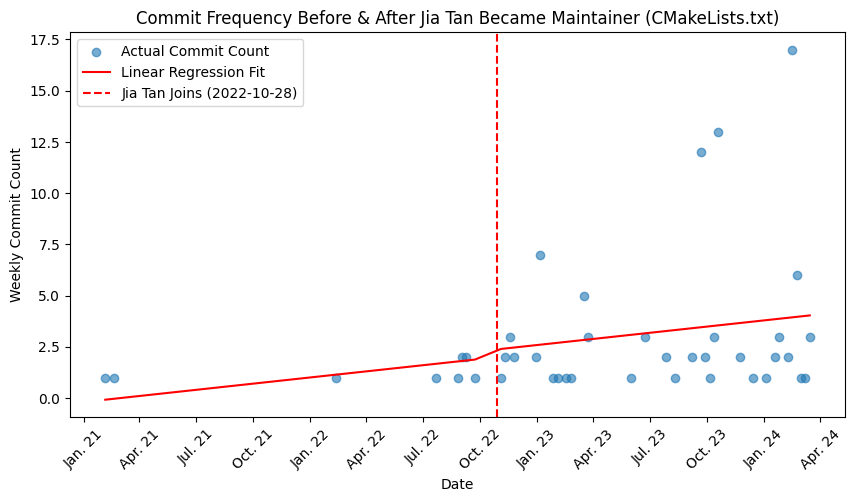

In [ ]:
X = weekly_cmakelist_commits[["weeks_since_JT_joined", "treatment"]]
y = weekly_cmakelist_commits["commit_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

weekly_cmakelist_commits["predicted_commit_count"] = linear_model.predict(X)
weekly_cmakelist_commits["date"] = maintainer_join_date + pd.to_timedelta(weekly_cmakelist_commits["weeks_since_JT_joined"] * 7, unit="D")

plt.figure(figsize=(10, 5))
plt.scatter(weekly_cmakelist_commits["date"], weekly_cmakelist_commits["commit_count"], alpha=0.6, label="Actual Commit Count")
plt.plot(weekly_cmakelist_commits["date"], weekly_cmakelist_commits["predicted_commit_count"], color="red", label="Linear Regression Fit")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

plt.xlabel("Date")
plt.ylabel("Weekly Commit Count")
plt.title("Commit Frequency Before & After Jia Tan Became Maintainer (CMakeLists.txt)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

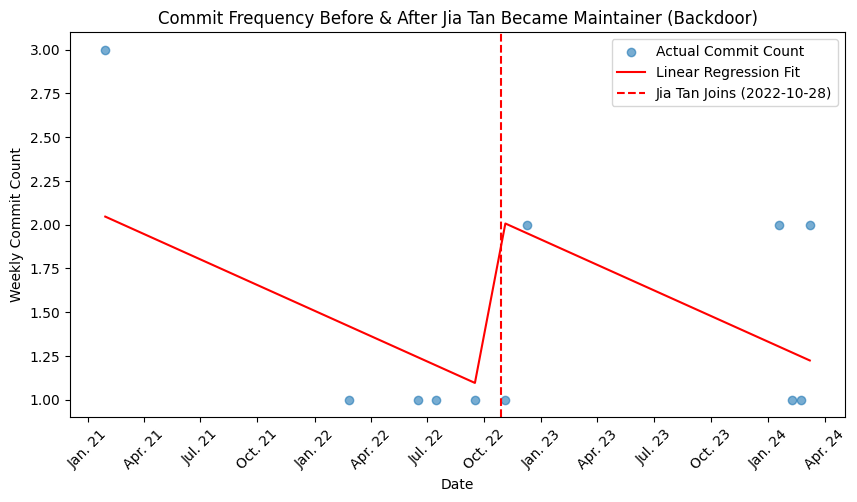

In [ ]:
X = weekly_backdoor_commits[["weeks_since_JT_joined", "treatment"]]
y = weekly_backdoor_commits["commit_count"]

linear_model = LinearRegression()
linear_model.fit(X, y)

weekly_backdoor_commits["predicted_commit_count"] = linear_model.predict(X)
weekly_backdoor_commits["date"] = maintainer_join_date + pd.to_timedelta(weekly_backdoor_commits["weeks_since_JT_joined"] * 7, unit="D")

plt.figure(figsize=(10, 5))
plt.scatter(weekly_backdoor_commits["date"], weekly_backdoor_commits["commit_count"], alpha=0.6, label="Actual Commit Count")
plt.plot(weekly_backdoor_commits["date"], weekly_backdoor_commits["predicted_commit_count"], color="red", label="Linear Regression Fit")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b. %y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.axvline(x=maintainer_join_date, color='r', linestyle='--', label="Jia Tan Joins (2022-10-28)")

plt.xlabel("Date")
plt.ylabel("Weekly Commit Count")
plt.title("Commit Frequency Before & After Jia Tan Became Maintainer (Backdoor)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:

weekly_backdoor_commits = weekly_backdoor_commits.rename(columns={"commit_count": "frequency"})
weekly_cmakelist_commits = weekly_cmakelist_commits.rename(columns={"commit_count": "frequency"})
weekly_configure_commits = weekly_configure_commits.rename(columns={"commit_count": "frequency"})
weekly_commits = weekly_commits.rename(columns={"commit_count": "frequency"})
weekly_issues_closed = weekly_issues_closed.rename(columns={"issue_closed_count": "frequency"})
weekly_pr_closed = weekly_pr_closed.rename(columns={"pr_closed_count": "frequency"})


weekly_backdoor_commits["file"] = "sus_file_backdoor"
weekly_cmakelist_commits["file"] = "sus_file_CMakeLists"
weekly_configure_commits["file"] = "sus_file_configure"
weekly_commits["file"] = "weekly_commit_frequency"
weekly_issues_closed["file"] = "weekly_issue_closed"
weekly_pr_closed["file"] = "weekly_pr_closed"


common_columns = ["weeks_since_JT_joined", "frequency", "treatment", "file"]


weekly_backdoor_commits = weekly_backdoor_commits[common_columns]
weekly_cmakelist_commits = weekly_cmakelist_commits[common_columns]
weekly_configure_commits = weekly_configure_commits[common_columns]
weekly_commits = weekly_commits[common_columns]
weekly_issues_closed = weekly_issues_closed[common_columns]
weekly_pr_closed = weekly_pr_closed[common_columns]


combined_df = pd.concat([
    weekly_backdoor_commits, weekly_cmakelist_commits, weekly_configure_commits,
    weekly_commits, weekly_issues_closed, weekly_pr_closed
], ignore_index=True)




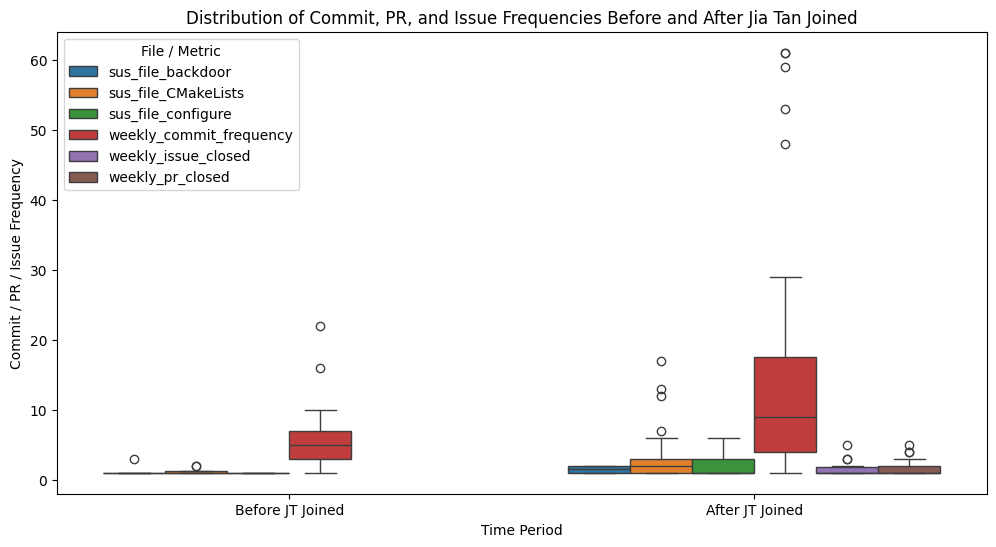

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="treatment", y="frequency", hue="file", data=combined_df)

# Customize labels
plt.xticks([0, 1], ["Before JT Joined", "After JT Joined"])
plt.xlabel("Time Period")
plt.ylabel("Commit / PR / Issue Frequency")
plt.title("Distribution of Commit, PR, and Issue Frequencies Before and After Jia Tan Joined")

plt.legend(title="File / Metric")
plt.show()